In [1]:
import pickle
import env_methods as em
import datetime as dt
import numpy as np
import vis_methods as vs

In [8]:
main_path = r'C:\Users\bpara\Geo data\Time series result'

with open(main_path, 'rb') as f:
        miss_data = pickle.load(f)
"""        
with open("Nino series", 'rb') as f:
        nino_data = pickle.load(f)
        
with open("PDO series", 'rb') as f:
        PDO_data = pickle.load(f)
        
with open("AMO series", 'rb') as f:
        AMO_data = pickle.load(f)
"""

'        \nwith open("Nino series", \'rb\') as f:\n        nino_data = pickle.load(f)\n        \nwith open("PDO series", \'rb\') as f:\n        PDO_data = pickle.load(f)\n        \nwith open("AMO series", \'rb\') as f:\n        AMO_data = pickle.load(f)\n'

In [3]:
with open("PNA series", 'rb') as f:
        PNA_data = pickle.load(f)

In [4]:
#Time bounds here is inclusive, exclusive, please choose them so both datasets have values in all months in that range
def pearson(climate_series, ckey, flood_series, fkey, lat, lon, start_time, end_time):
    
    cstart_index = em.find_closest_val(start_time, climate_series["time"])
    cend_index = em.find_closest_val(end_time, climate_series["time"])
    climate_series_data = climate_series[ckey][cstart_index:cend_index]
    #Find standard deviation of climate series
    cmean = 0
    ccount = 0
    for cdata in climate_series_data:
        if cdata != None:
            ccount += 1
            cmean += cdata
    cmean /= ccount
    
    cstdev = 0
    for cdata in climate_series_data:
        if cdata!=None:
            cstdev += (cdata - cmean) ** 2
            
    cstdev /= (ccount - 1)
    cstdev **= 0.5
    
    flat = em.find_closest_val(lat, flood_series["lat"])
    flon = em.find_closest_val(lon, flood_series["lon"])

    fstart_index = em.find_closest_val(start_time, flood_series["count"][flat][flon]["time"])
    fend_index = em.find_closest_val(end_time, flood_series["count"][flat][flon]["time"])
    
    #Check if this is over a river or not
    if flood_series[fkey][flat][flon][fkey] == None: return np.nan
    
    flood_series_data = flood_series[fkey][flat][flon][fkey][fstart_index:fend_index]
    #Find standard deviation of flood series at [lat][lon]
    fmean = 0
    fcount = 0
    for fdata in flood_series_data:
        if fdata != None:
            fcount += 1
            fmean += fdata
    fmean /= fcount
    
    fstdev = 0
    for fdata in flood_series_data:
        if fdata!=None:
            fstdev += (fdata - fmean) ** 2
    fstdev /= (fcount - 1)
    fstdev **= 0.5
    
    #Now find the covariance
    
    covar = 0
    for i in range(len(climate_series_data)):
        covar += climate_series_data[i] * flood_series_data[i]
    
    covar /= len(climate_series_data)
    
    covar -= fmean * cmean
    
    return covar/(fstdev * cstdev)

In [5]:
def pearson_mapping(climate_series, ckey, flood_series, fkey, start_time, end_time):
    result = dict()
    result["lon"] = flood_series["lon"]
    result["lat"] = flood_series["lat"]
    result["pearson"] = []
    
    t1 = dt.datetime.now()
    for lat in flood_series["lat"]:
        row = []
        for lon in flood_series["lon"]:
            row.append(pearson(climate_series, ckey, flood_series, fkey, lat, lon, start_time, end_time))
        result["pearson"].append(row)
    t2 = dt.datetime.now()
    print("completed in" + str(t2 - t1))
        
    return result

In [6]:
t1 = dt.datetime(1985, 10, 1)
t2 = dt.datetime(2013, 9, 1)

224 latitutdes total, 50.35 - 28.05

In [6]:
nino_series = pearson_mapping(nino_data, "nino", miss_data, "count", t1, t2)

file = open("Nino corr", "wb")
pickle.dump(nino_series, file)
file.close()

completed in0:02:58.037293


In [7]:
nina_series = pearson_mapping(nino_data, "nina", miss_data, "count", t1, t2)

file = open("Nina corr", "wb")
pickle.dump(nina_series, file)
file.close()

completed in0:02:59.745056


In [8]:
amo_series = pearson_mapping(AMO_data, "amo", miss_data, "count", t1, t2)

file = open("amo corr", "wb")
pickle.dump(amo_series, file)
file.close()

completed in0:03:05.442793


In [9]:
pdo_series = pearson_mapping(PDO_data, "pdo", miss_data, "count", t1, t2)

file = open("pdo corr", "wb")
pickle.dump(pdo_series, file)
file.close()

completed in0:03:07.681152


In [11]:
pna_series = pearson_mapping(PNA_data, "npa", miss_data, "count", t1, t2)

file = open("pna corr", "wb")
pickle.dump(pna_series, file)
file.close()

completed in0:03:45.203491


0
223


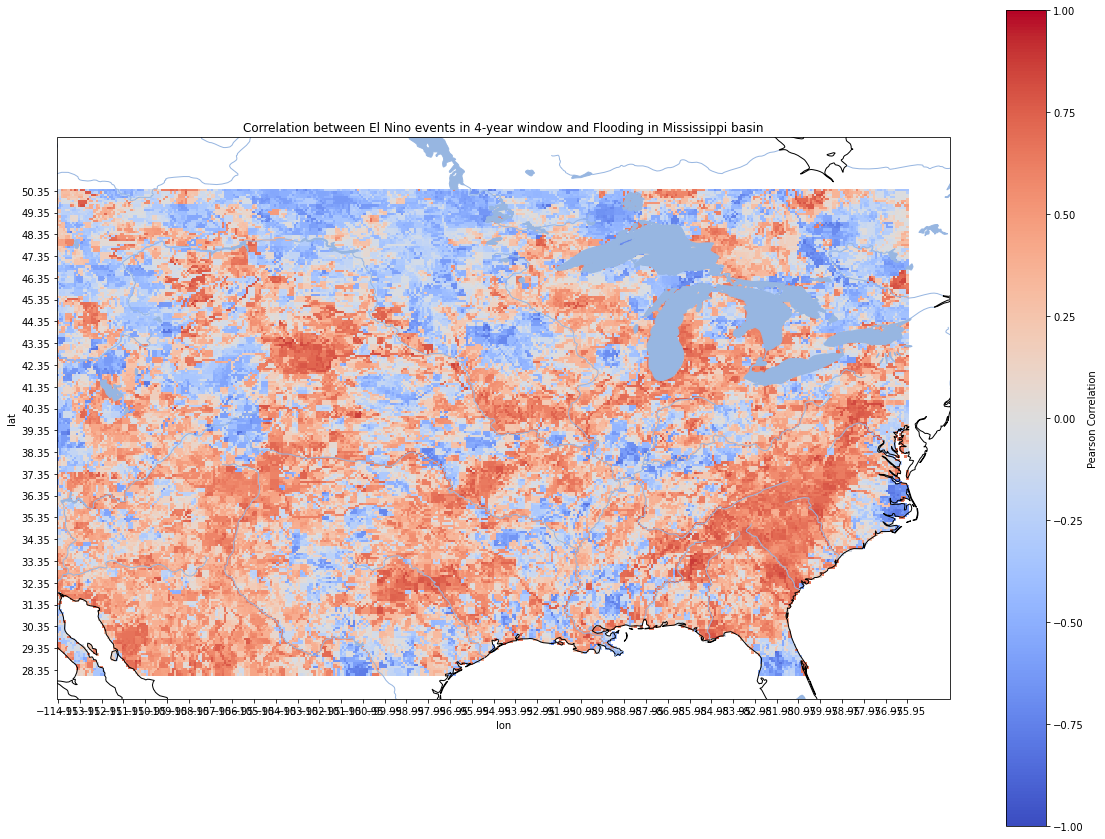

In [10]:
vs.plot_data(nino_series["lon"], nino_series["lat"], np.asarray(nino_series["pearson"]), "Pearson Correlation", "Correlation between El Nino events in 4-year window and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1)

0
223


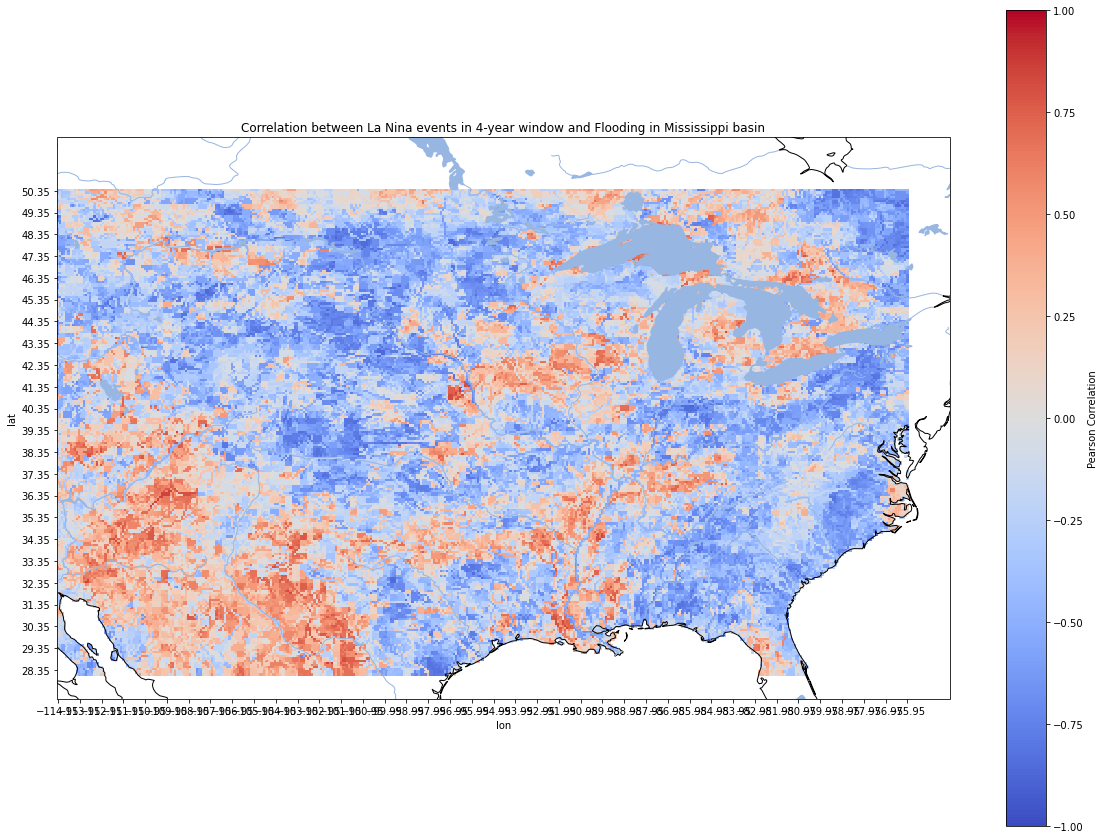

In [14]:
vs.plot_data(nina_series["lon"], nina_series["lat"], np.asarray(nina_series["pearson"]), "Pearson Correlation", "Correlation between La Nina events in 4-year window and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1)

0
223


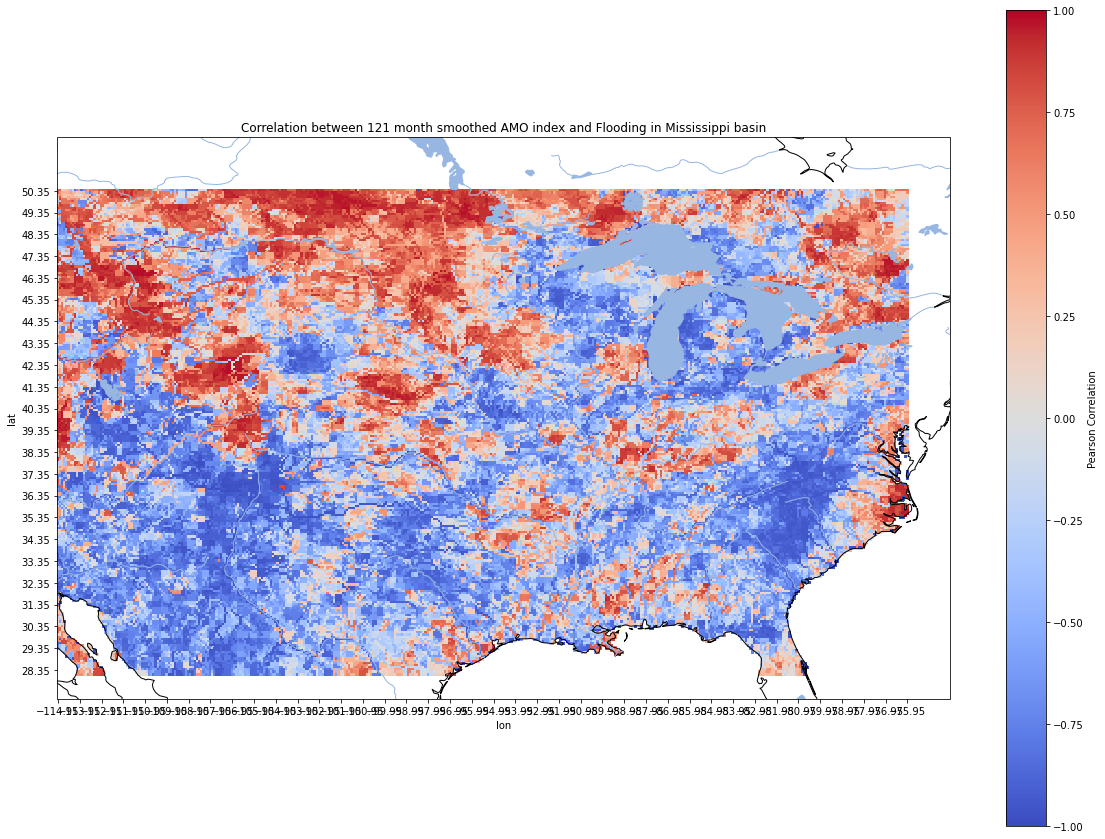

In [12]:
vs.plot_data(amo_series["lon"], amo_series["lat"], np.asarray(amo_series["pearson"]), "Pearson Correlation", "Correlation between 121 month smoothed AMO index and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1)

0
223


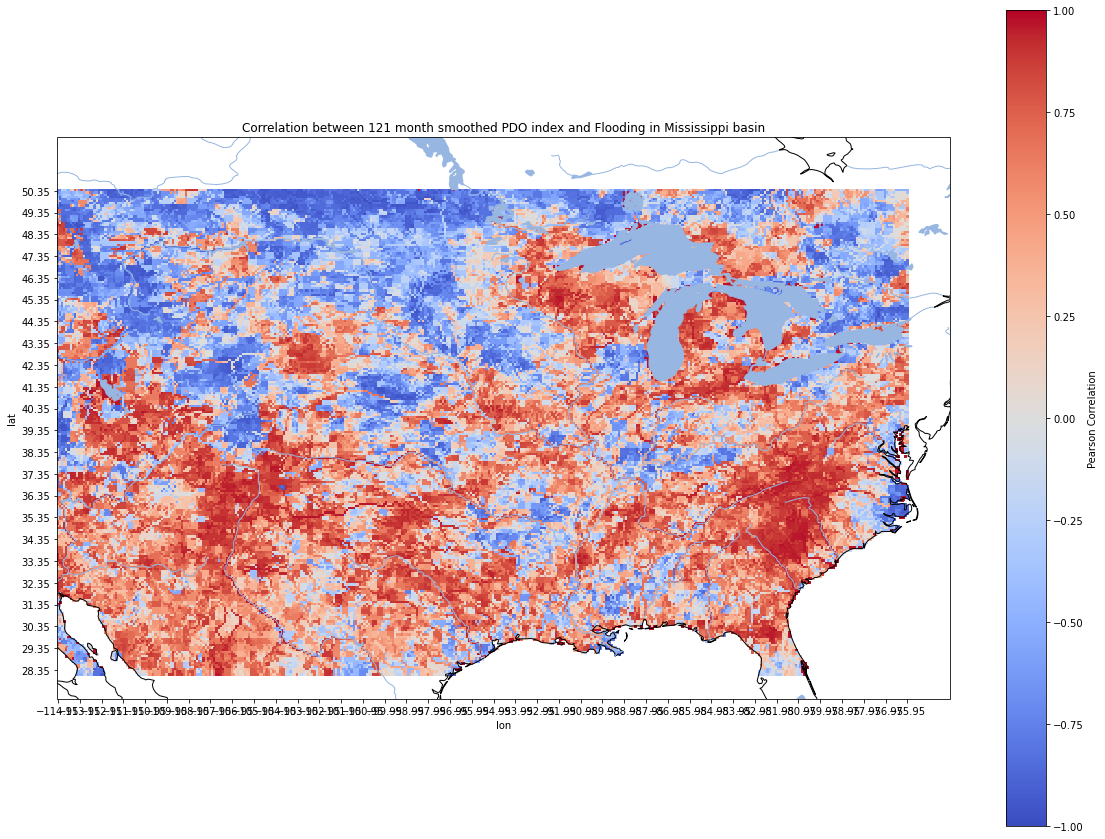

In [13]:
vs.plot_data(pdo_series["lon"], pdo_series["lat"], np.asarray(pdo_series["pearson"]), "Pearson Correlation", "Correlation between 121 month smoothed PDO index and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1)

0
223


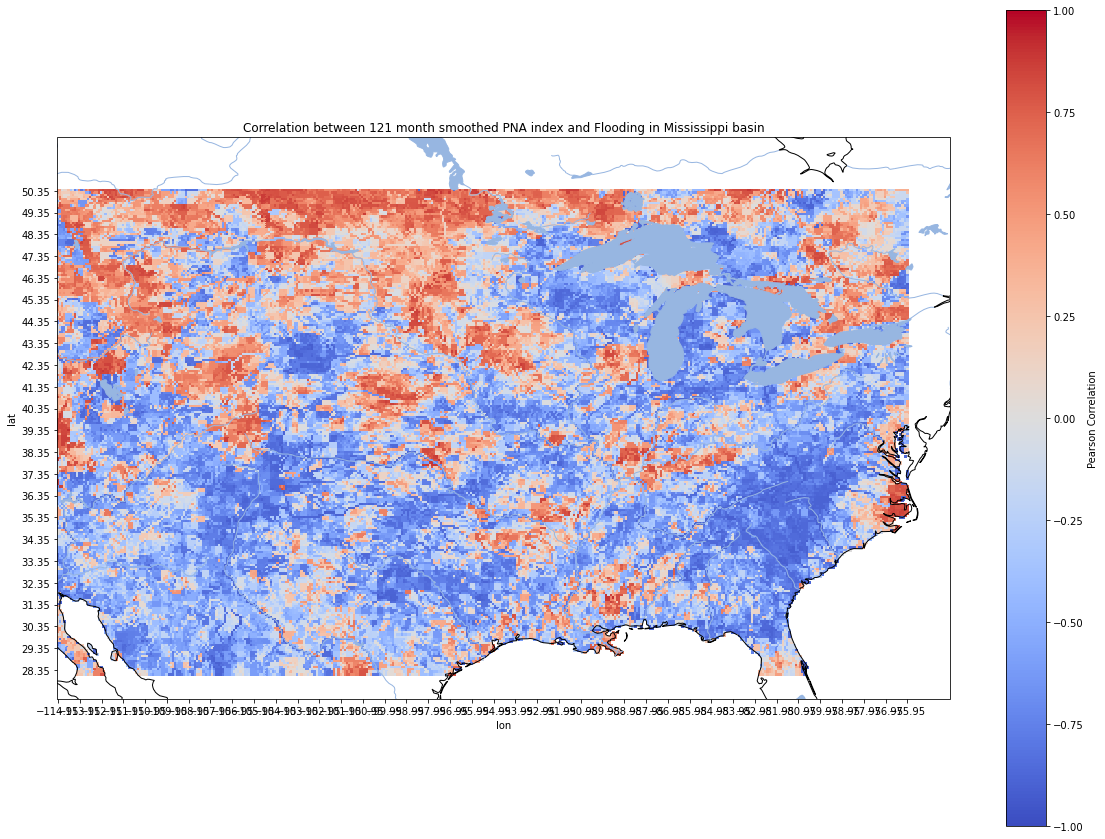

In [12]:
vs.plot_data(pna_series["lon"], pna_series["lat"], np.asarray(pna_series["pearson"]), "Pearson Correlation", "Correlation between 121 month smoothed PNA index and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1)